In [1]:
import os
import pandas as pd 
import numpy as np
import json 
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'browser'

In [2]:
data_path = os.path.join(os.path.abspath(os.curdir), 'data', 'fire_final.csv')

In [3]:
data = pd.read_csv(data_path, low_memory=False) 
data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
data

,year,month,code,region,county,start_datetime,end_datetime,category,specific,total_ba,rekindling,negligent,intentional,extinction_time
0,2001,Jul,BL20190,Coimbra,Oliveira do Hospital,2001-07-02 16:40:00,2001-07-02 17:25:00,unknown,desconhecida,0.300000,1,1,0,0 days 00:45:00
1,2001,Aug,DM201114,Aveiro,Arouca,2001-08-03 17:47:00,2001-08-06 18:15:00,unknown,desconhecida,174.000000,0,1,0,3 days 00:28:00
2,2001,Sep,DM401117,Viana do Castelo,Melgaço,2001-09-17 18:59:00,2001-09-18 02:40:00,unknown,desconhecida,54.000000,0,1,0,0 days 07:41:00
3,2001,Sep,DM901112,Braga,Terras de Bouro,2001-09-04 23:05:00,2001-09-05 11:15:00,unknown,desconhecida,80.000000,0,1,0,0 days 12:10:00
4,2001,Sep,DM901113,Braga,Amares,2001-09-06 18:50:00,2001-09-07 00:25:00,unknown,desconhecida,28.000000,0,1,0,0 days 05:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331222,2020,Jul,AG120614,NaN,NaN,2020-07-06 14:56:00,2020-07-07 10:00:00,unknown,desconhecida,535.632996,0,1,0,0 days 19:04:00
331223,2020,Jul,BL220206,NaN,NaN,2020-07-04 13:09:00,2020-07-05 00:53:00,unknown,desconhecida,156.279175,0,0,1,0 days 11:44:00
331224,2020,Jul,AT320158,NaN,NaN,2020-07-04 16:00:00,2020-07-04 17:07:00,unknown,desconhecida,1.407192,0,0,0,0 days 01:07:00
331225,2020,Jul,RO120327,NaN,NaN,2020-07-05 16:09:00,2020-07-05 20:39:00,rekindling,desconhecida,26.590605,0,0,0,0 days 04:30:00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331227 entries, 0 to 331226
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             331227 non-null  int64  
 1   month            245343 non-null  object 
 2   code             331227 non-null  object 
 3   region           327591 non-null  object 
 4   county           327642 non-null  object 
 5   start_datetime   245343 non-null  object 
 6   end_datetime     245089 non-null  object 
 7   category         331227 non-null  object 
 8   specific         331227 non-null  object 
 9   total_ba         331227 non-null  float64
 10  rekindling       331227 non-null  int64  
 11  negligent        331227 non-null  int64  
 12  intentional      331227 non-null  int64  
 13  extinction_time  245089 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 35.4+ MB


There's no location info for 2019 and 2020, but total_ba is available for all years

In [6]:
data[data['year'] > 2018]

,year,month,code,region,county,start_datetime,end_datetime,category,specific,total_ba,rekindling,negligent,intentional,extinction_time
327713,2019,May,AT119105,NaN,NaN,2019-05-02 16:11:00,2019-05-02 16:47:00,unknown,desconhecida,0.197903,0,1,0,0 days 00:36:00
327714,2019,May,AT119110,NaN,NaN,2019-05-07 13:17:00,2019-05-07 13:49:00,unknown,desconhecida,0.037584,0,1,0,0 days 00:32:00
327715,2019,May,AT119118,NaN,NaN,2019-05-13 15:55:00,2019-05-13 17:04:00,unknown,desconhecida,2.581765,0,0,0,0 days 01:09:00
327716,2019,May,AT119124,NaN,NaN,2019-05-14 17:00:00,2019-05-14 17:50:00,unknown,desconhecida,1.591001,0,1,0,0 days 00:50:00
327717,2019,May,AT119127,NaN,NaN,2019-05-15 18:20:00,2019-05-15 22:23:00,unknown,desconhecida,3.501042,0,0,0,0 days 04:03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331222,2020,Jul,AG120614,NaN,NaN,2020-07-06 14:56:00,2020-07-07 10:00:00,unknown,desconhecida,535.632996,0,1,0,0 days 19:04:00
331223,2020,Jul,BL220206,NaN,NaN,2020-07-04 13:09:00,2020-07-05 00:53:00,unknown,desconhecida,156.279175,0,0,1,0 days 11:44:00
331224,2020,Jul,AT320158,NaN,NaN,2020-07-04 16:00:00,2020-07-04 17:07:00,unknown,desconhecida,1.407192,0,0,0,0 days 01:07:00
331225,2020,Jul,RO120327,NaN,NaN,2020-07-05 16:09:00,2020-07-05 20:39:00,rekindling,desconhecida,26.590605,0,0,0,0 days 04:30:00


In [7]:
data['specific'].unique()

array(['desconhecida', 'clandestinos', 'vandalismo',
       'outras situações dolosas', 'autárquica', 'indústria',
       'actividades clandestinas', 'núcleos habitacionais permanentes',
       'núcleos habitacionais temporários associados ao recreio',
       'limpeza do solo agrícola', 'limpeza do solo florestal',
       'limpeza de áreas urbanizadas', 'borralheiras',
       'renovação de pastagens',
       'penetração em áreas de caça e margens dos rios',
       'limpeza de caminhos, acessos e instalações',
       'proteção contra incêndios', 'outras', 'com medidas preventivas',
       'auto-ignição', 'recreio e lazer', 'confecção de comida',
       'fumadores a pé', 'em circulação motorizada', 'fumigação',
       'linhas eléctricas', 'caminhos de ferro', 'tubos de escape',
       'acidentes de viação', 'alfaias agrícolas', 'máquinas agrícolas',
       'equipamento florestal', 'motosserras', 'máquinas florestais',
       'máquinas industriais', 'outra maquinaria e equipamento', 'vidr

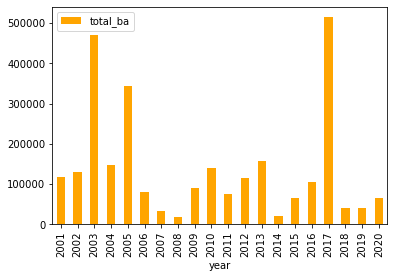

In [8]:
year_ba = data[['year', 'total_ba']].groupby('year').agg('sum') 
year_ba.plot(kind='bar', stacked=False, color=['orange'])
plt.show()

In [9]:
data[(data['county'] == 'Pedrógão Grande') & (data['year'] == 2017)]

,year,month,code,region,county,start_datetime,end_datetime,category,specific,total_ba,rekindling,negligent,intentional,extinction_time
325804,2017,Jun,BL4171577,Leiria,Pedrógão Grande,2017-06-17 14:43:00,2017-07-26 12:00:00,unknown,desconhecida,30617.851562,0,1,0,38 days 21:17:00


In [10]:
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_agg_2017 = data[data['year'] == 2017].groupby('month').agg('sum')   
month_agg_2017  = month_agg_2017 .reindex(order, axis=0)
month_agg_2017

,year,total_ba,rekindling,negligent,intentional
month,,,,,
Jan,235989,1233.148119,0,76,21
Feb,82697,405.524295,0,28,7
Mar,379196,2581.656015,0,122,23
Apr,514335,4858.086695,0,105,43
May,207751,677.492111,0,54,13
Jun,465927,54953.208901,0,91,49
Jul,615185,72289.162947,0,106,86
Aug,1097248,85799.122645,0,122,169
Sep,558709,14254.423397,0,97,62


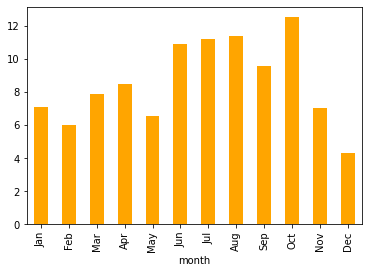

In [11]:
np.log(month_agg_2017['total_ba']).plot(kind='bar', stacked=False, color=['orange'])
plt.show()

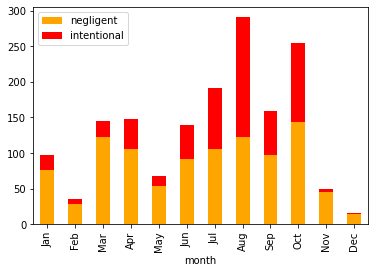

In [12]:
month_agg_2017[['negligent', 'intentional']].plot(kind='bar', stacked=True, color=['orange', 'red'])
plt.show()

In [13]:
cat_agg_2017 = data[data['year'] == 2017].groupby('category').agg('sum') 
cat_agg_2017

,year,total_ba,rekindling,negligent,intentional
category,,,,,
natural,56476,21584.168463,0,0,0
rekindling,401383,61556.339626,0,0,0
unknown,4810545,431255.395867,0,1004,590


In [14]:
counties_geo = os.path.join(os.path.abspath(os.curdir), 'data', 'ContinenteConcelhos.geojson') 
counties = json.load(open(counties_geo, 'r', encoding='utf-8'))  

In [15]:
# reduce decimal digits
for i in range(len(counties['features'])): 
        for j in range(len(counties['features'][i]['geometry']['coordinates'][0])):
            it = counties['features'][i]['geometry']['coordinates'][0][j]
            counties['features'][i]['geometry']['coordinates'][0][j] = list(map(lambda x: np.round(x, decimals=4).tolist(), it))

In [18]:
# keep only selected property
for i in range(len(counties['features'])):
    counties['features'][i]['properties'] = {'Concelho': counties['features'][i]['properties']['Concelho']}

In [19]:
# add county 'id' to geojson file
for feature in counties['features']:
    feature['id'] = feature['properties']['Concelho']

In [25]:
counties['features'][0]['properties']

{'Concelho': 'ÁGUEDA'}

In [24]:
counties['features'][0]['id']

'ÁGUEDA'

In [22]:
# export to json file
with open('counties.geojson', 'w') as f:
    json.dump(counties, f)

In [23]:
regions_geo = os.path.join(os.path.abspath(os.curdir), 'data', 'ContinenteDistritos.geojson')  
regions = json.load(open(regions_geo, 'r', encoding='utf-8')) 

In [26]:
# reduce decimal digits
for i in range(len(regions['features'])): 
        for j in range(len(regions['features'][i]['geometry']['coordinates'][0])):
            it = regions['features'][i]['geometry']['coordinates'][0][j]
            regions['features'][i]['geometry']['coordinates'][0][j] = list(map(lambda x: np.round(x, decimals=4).tolist(), it))

In [27]:
# keep only selected property
for i in range(len(regions['features'])):
    regions['features'][i]['properties'] = {'Distrito': regions['features'][i]['properties']['Distrito']}

In [29]:
# add region 'id' to geojson file
for feature in regions['features']:
    feature['id'] = feature['properties']['Distrito']

In [31]:
regions['features'][0]['properties']

{'Distrito': 'AVEIRO'}

In [30]:
regions['features'][0]['id']

'AVEIRO'

In [32]:
# export to json file
with open('regions.geojson', 'w') as f:
    json.dump(regions, f)

Log of burnt area in 2017 per county

In [33]:
counties = json.load(open(os.path.join(os.path.abspath(os.curdir), 'assets', 'counties.geojson'), 'r', encoding='utf-8'))  

In [34]:
county_agg_2017 = data[data['year'] == 2017].groupby('county').agg('sum')  
county_agg_2017.index = county_agg_2017.index.str.upper()
county_agg_2017

,year,total_ba,rekindling,negligent,intentional
county,,,,,
ABRANTES,14119,5061.084746,0,2,3
AGUIAR DA BEIRA,2017,3.905494,0,1,0
ALANDROAL,10085,15.876846,0,4,0
ALBERGARIA-A-VELHA,32272,396.279211,0,0,1
ALBUFEIRA,4034,5.628191,0,1,0
...,...,...,...,...,...
VISEU,18153,135.802551,0,1,1
VIZELA,14119,77.191001,0,0,0
ÁGUEDA,42357,426.665014,0,8,0


In [35]:
data_choroplethmap = dict(type='choroplethmapbox', 
                          geojson=counties,
                          locations=county_agg_2017.index, 
                          z=county_agg_2017['total_ba'],
                          
                          
                          colorscale=[[0, 'rgb(255,255,0)'], [1, 'rgb(255,0,0)']],
                          colorbar=dict(title='Burnt Area by county in 2017')
                         )

layout_choroplethmap = dict(mapbox=dict(style='white-bg',
                                        layers=[dict(source=feature,
                                                     below='traces',
                                                     type='fill',
                                                     fill=dict(outlinecolor='gray')
                                                    ) for feature in counties['features']],
                                        center=dict(lat=39.557191, 
                                                    lon=-7.8536599
                                                   ),
                                        zoom=6),
                           )

In [36]:
fig_choroplethmap = go.Figure(data=data_choroplethmap, layout=layout_choroplethmap)

fig_choroplethmap.show(renderer='browser')

In [37]:
regions = json.load(open(os.path.join(os.path.abspath(os.curdir), 'assets', 'regions.geojson'), 'r', encoding='utf-8'))  

In [38]:
region_agg_2017 = data[data['year'] == 2017].groupby('region').agg('sum')  
region_agg_2017.index = region_agg_2017.index.str.upper()
region_agg_2017

,year,total_ba,rekindling,negligent,intentional
region,,,,,
AVEIRO,407434,11821.866541,0,37,26
BEJA,48408,800.562716,0,11,6
BRAGA,558709,10515.780966,0,41,84
BRAGANÇA,288431,21387.961824,0,60,36
CASTELO BRANCO,163377,105821.601848,0,23,41
COIMBRA,161360,168727.971738,0,19,43
FARO,108918,260.768206,0,26,6
GUARDA,655525,72343.460786,0,237,48
LEIRIA,48408,57087.089355,0,4,6


In [39]:
data_choroplethmap = dict(type='choroplethmapbox', 
                          geojson=regions,
                          locations=region_agg_2017.index, 
                          z=region_agg_2017['intentional'],
                          
                          
                          colorscale='inferno',
                          colorbar=dict(title='Intentional by region in 2017')
                         )

layout_choroplethmap = dict(mapbox=dict(style='white-bg',
                                        layers=[dict(source=feature,
                                                     below='traces',
                                                     type='fill',
                                                     fill=dict(outlinecolor='gray')
                                                    ) for feature in regions['features']],
                                        center=dict(lat=39.557191, 
                                                    lon=-7.8536599
                                                   ),
                                        zoom=6),
                           )

In [40]:
fig_choroplethmap = go.Figure(data=data_choroplethmap, layout=layout_choroplethmap)

fig_choroplethmap.show(renderer='browser')